In [1]:
import os
print(os.getcwd())  # Should print /content
print(os.listdir())  # Should include glove.6B.100d.txt after downloading/uploading

/kaggle/working
['__notebook__.ipynb']


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxte

In [3]:
!pip install pandas numpy scikit-learn nltk imbalanced-learn xgboost lightgbm matplotlib gensim transformers torch allennlp

INFO: pip is looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 60.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did 

In [4]:

# Clear pip cache
import os
os.system('pip cache purge')

# Uninstall existing conflicting packages
!pip uninstall -y scikit-learn imbalanced-learn numpy scipy pandas gensim nltk transformers torch xgboost lightgbm matplotlib

# Install compatible versions
!pip install --no-cache-dir --force-reinstall \
    pandas==2.2.3 \
    numpy==1.26.4 \
    scipy==1.13.1 \
    scikit-learn==1.2.2 \
    imbalanced-learn==0.12.3 \
    nltk==3.9.1 \
    gensim==4.3.3 \
    transformers==4.52.4 \
    torch==2.6.0 \
    xgboost==2.0.3 \
    lightgbm==4.5.0 \
    matplotlib==3.7.2

# Verify working directory and files
print(f"Current working directory: {os.getcwd()}")  # Should be /kaggle/working
print(f"Files in directory: {os.listdir()}")

import pandas as pd

# Verify spam.csv
dataset_path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path, encoding='latin-1')
    print(f"Dataset shape: {data.shape}")
    print(f"Columns: {data.columns.tolist()}")
    print("First few rows:")
    print(data.head())
else:
    raise FileNotFoundError("spam.csv not found at /kaggle/input/sms-spam-collection-dataset/spam.csv. Attach the SMS Spam Collection dataset.")

# Download GloVe embeddings if not present
glove_path = '/kaggle/working/glove.6B.100d.txt'
if not os.path.exists(glove_path):
    print("Downloading GloVe embeddings...")
    !wget -O /kaggle/working/glove.6B.zip http://nlp.stanford.edu/data/glove.6B.zip
    !unzip /kaggle/working/glove.6B.zip -d /kaggle/working/
    print("GloVe download complete.")
else:
    print("GloVe embeddings already present.")

# Verify GloVe
if os.path.exists(glove_path):
    with open(glove_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
        print(f"GloVe first line: {first_line.strip()}")
else:
    raise FileNotFoundError("glove.6B.100d.txt not found. Upload to /kaggle/working/glove.6B.100d.txt.")

print("\nSetup complete for all models!")


Files removed: 132
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
Found existing installation: transformers 4.52.4
Uninstalling transformers-4.52.4:
  Successfully uninstalled transformers-4.52.4
Found existing installation: torch 2.6.0+cu

# **Logistic Regression with all techniques**

2025-09-21 14:54:32.901388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758466473.274247      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758466473.376970      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


--- Training LogisticRegression with BOW ---


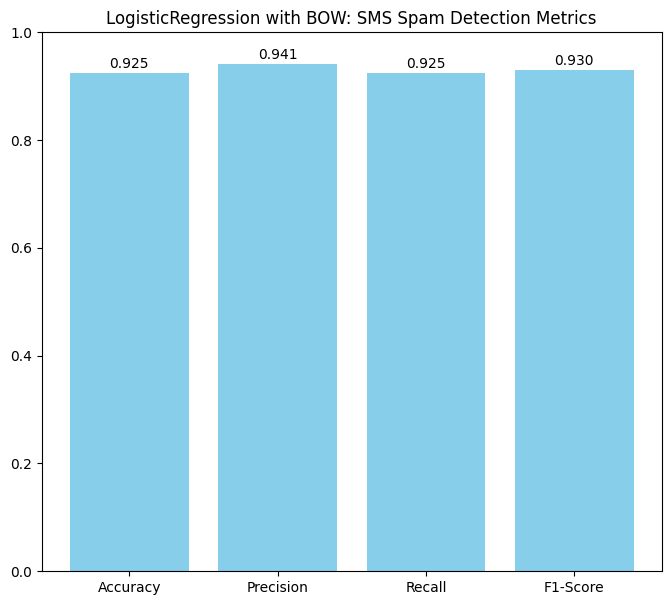

LogisticRegression with BOW Metrics: {'Accuracy': 0.9246411483253588, 'Precision': 0.9412801310502816, 'Recall': 0.9246411483253588, 'F1-Score': 0.9295829337712469}

--- Training LogisticRegression with TF-IDF ---


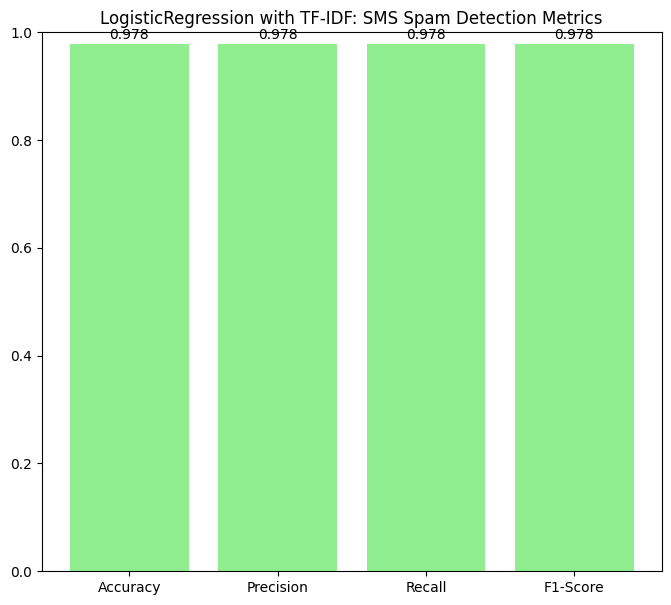

LogisticRegression with TF-IDF Metrics: {'Accuracy': 0.9778708133971292, 'Precision': 0.9775504845243047, 'Recall': 0.9778708133971292, 'F1-Score': 0.9775816440651508}

--- Training LogisticRegression with Word2Vec ---


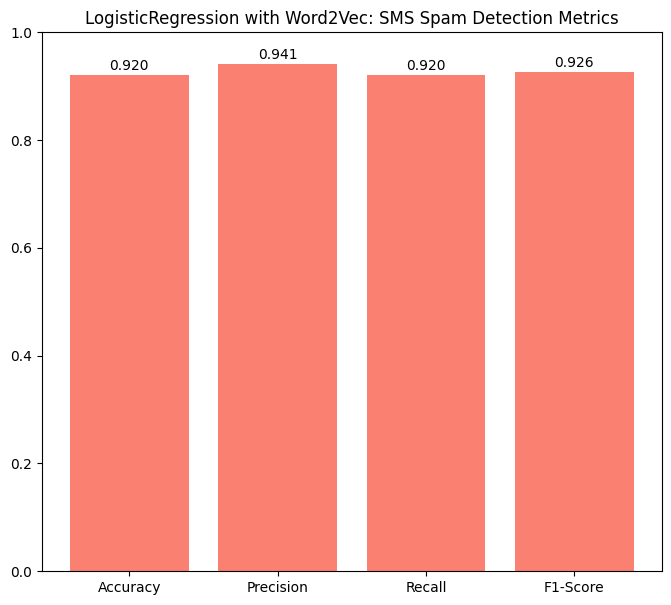

LogisticRegression with Word2Vec Metrics: {'Accuracy': 0.9204545454545454, 'Precision': 0.9407972621363178, 'Recall': 0.9204545454545454, 'F1-Score': 0.9262922491215726}

--- Training LogisticRegression with GloVe ---


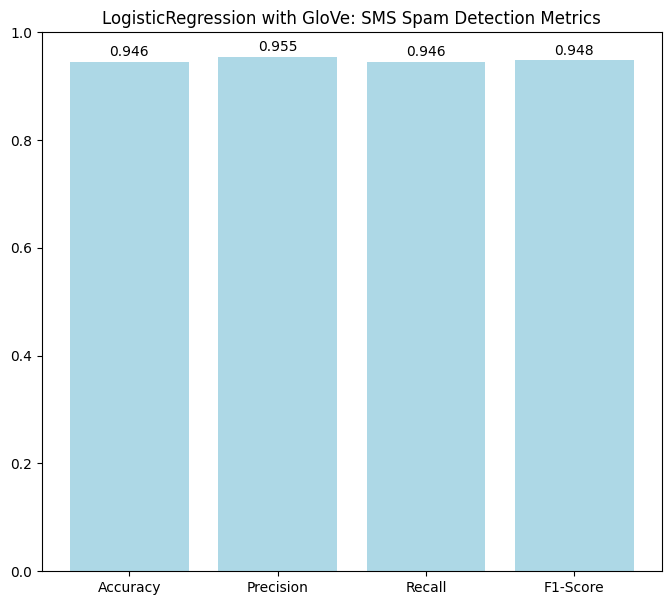

LogisticRegression with GloVe Metrics: {'Accuracy': 0.9455741626794258, 'Precision': 0.9546890420087921, 'Recall': 0.9455741626794258, 'F1-Score': 0.9482407213374849}

--- Training LogisticRegression with Doc2Vec ---


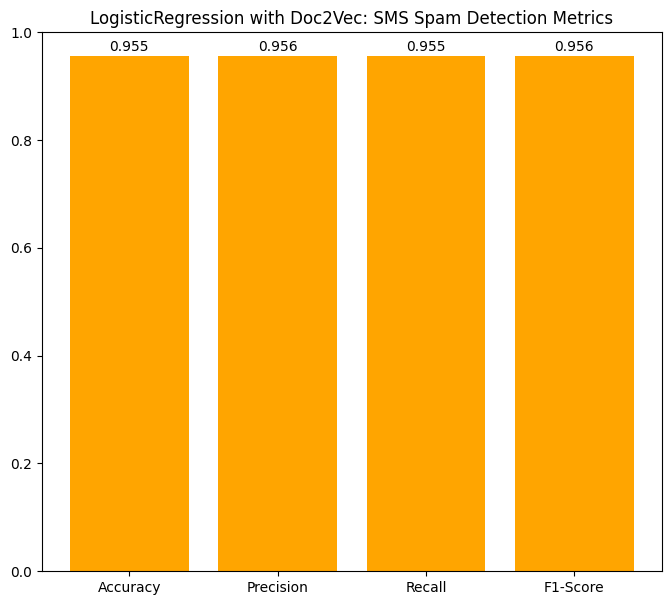

LogisticRegression with Doc2Vec Metrics: {'Accuracy': 0.9551435406698564, 'Precision': 0.9562275217284548, 'Recall': 0.9551435406698564, 'F1-Score': 0.955607787795396}

--- Training LogisticRegression with BERT ---


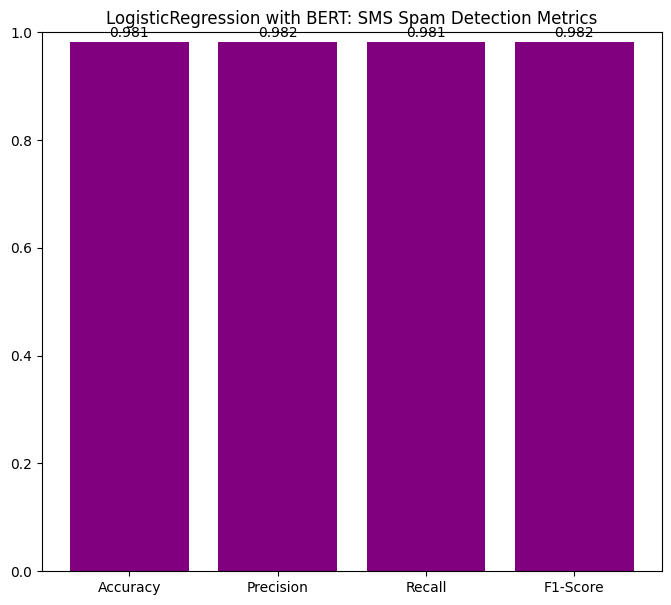

LogisticRegression with BERT Metrics: {'Accuracy': 0.9814593301435407, 'Precision': 0.9815794044333065, 'Recall': 0.9814593301435407, 'F1-Score': 0.9815128135552431}

Logistic Regression Results:
                Model Technique  Accuracy  Precision    Recall  F1-Score
0  LogisticRegression       BOW  0.924641   0.941280  0.924641  0.929583
1  LogisticRegression    TF-IDF  0.977871   0.977550  0.977871  0.977582
2  LogisticRegression  Word2Vec  0.920455   0.940797  0.920455  0.926292
3  LogisticRegression     GloVe  0.945574   0.954689  0.945574  0.948241
4  LogisticRegression   Doc2Vec  0.955144   0.956228  0.955144  0.955608
5  LogisticRegression      BERT  0.981459   0.981579  0.981459  0.981513


In [5]:

import pandas as pd
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import os
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Load dataset
dataset_path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError("spam.csv not found at /kaggle/input/sms-spam-collection-dataset/spam.csv. Attach the SMS Spam Collection dataset.")
data = pd.read_csv(dataset_path, encoding='latin-1')
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocessing functions
def preprocess_text_for_bow_tfidf(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text_for_embeddings(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def preprocess_text_for_bert(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

# Apply preprocessing
data_bow_tfidf = data.copy()
data_bow_tfidf['message'] = data_bow_tfidf['message'].apply(preprocess_text_for_bow_tfidf)
data_embeddings = data.copy()
data_embeddings['tokens'] = data_embeddings['message'].apply(preprocess_text_for_embeddings)
data_bert = data.copy()
data_bert['message'] = data_bert['message'].apply(preprocess_text_for_bert)

# Split data
X_bow_tfidf = data_bow_tfidf['message']
y = data_bow_tfidf['label']
X_train_bow_tfidf, X_test_bow_tfidf, y_train, y_test = train_test_split(X_bow_tfidf, y, test_size=0.3, random_state=42)
X_train_tokens, X_test_tokens, _, _ = train_test_split(data_embeddings['tokens'], y, test_size=0.3, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(data_bert['message'], y, test_size=0.3, random_state=42)

# Load GloVe embeddings
glove_path = '/kaggle/working/glove.6B.100d.txt'
def load_glove_embeddings(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found. Run the setup snippet first.")
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings(glove_path)

# Load BERT model and tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token

# Model and techniques
model_name = 'LogisticRegression'
model_base = LogisticRegression(random_state=42, max_iter=1000)
techniques = {
    'BOW': {
        'vectorizer': CountVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'TF-IDF': {
        'vectorizer': TfidfVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'Word2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4, sg=0),
            lambda model, tokens: np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0) if any(word in model.wv for word in tokens) else np.zeros(100)
        )
    },
    'GloVe': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            glove_embeddings,
            lambda emb, tokens: np.mean([emb[word] for word in tokens if word in emb], axis=0) if any(word in emb for word in tokens) else np.zeros(100)
        )
    },
    'Doc2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Doc2Vec(documents=[TaggedDocument(words=tokens, tags=[i]) for i, tokens in enumerate(train_tokens)], vector_size=100, window=5, min_count=2, workers=4, epochs=20),
            lambda model, tokens: model.infer_vector(tokens)
        )
    },
    'BERT': {
        'vectorizer': None,
        'train_data': X_train_bert.tolist(),
        'test_data': X_test_bert.tolist(),
        'is_sparse': False,
        'vector_size': 768,
        'custom_func': lambda train_texts, test_texts: (
            (tokenizer_bert, bert_model),
            lambda texts, tokenizer, model: get_bert_embeddings(texts, tokenizer, model)
        )
    }
}

# Collect results
results = pd.DataFrame(columns=['Model', 'Technique', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Loop over techniques
for technique_name, tech_config in techniques.items():
    print(f"\n--- Training {model_name} with {technique_name} ---")
    
    # Vectorize data
    if technique_name in ['BOW', 'TF-IDF']:
        vectorizer = tech_config['vectorizer']
        X_train_vec = vectorizer.fit_transform(tech_config['train_data'])
        X_test_vec = vectorizer.transform(tech_config['test_data'])
        is_sparse = True
    else:
        custom_obj, get_vector_func = tech_config['custom_func'](tech_config['train_data'], tech_config['test_data'])
        if technique_name == 'Word2Vec':
            w2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'GloVe':
            glove_emb = custom_obj
            X_train_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'Doc2Vec':
            d2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'BERT':
            tokenizer, bert_model = custom_obj
            X_train_vec = get_vector_func(tech_config['train_data'], tokenizer, bert_model)
            X_test_vec = get_vector_func(tech_config['test_data'], tokenizer, bert_model)
        is_sparse = False
    
    # Apply SMOTE
    if is_sparse:
        X_train_vec = X_train_vec.toarray()
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_vec, y_train)
    
    # Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_res, y_train_res)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_vec if not is_sparse else X_test_vec.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results.loc[len(results)] = [model_name, technique_name, accuracy, precision, recall, f1]
    
    # Visualize
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    colors = {'BOW': 'skyblue', 'TF-IDF': 'lightgreen', 'Word2Vec': 'salmon', 'GloVe': 'lightblue', 'Doc2Vec': 'orange', 'BERT': 'purple'}
    plt.figure(figsize=(8, 7))
    plt.bar(metrics.keys(), metrics.values(), color=colors.get(technique_name, 'gray'))
    plt.title(f'{model_name} with {technique_name}: SMS Spam Detection Metrics')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    plt.show()
    print(f"{model_name} with {technique_name} Metrics:", metrics)

print("\nLogistic Regression Results:")
print(results)


# **XGBoost with all techniques**


--- Training XGBoost with BOW ---


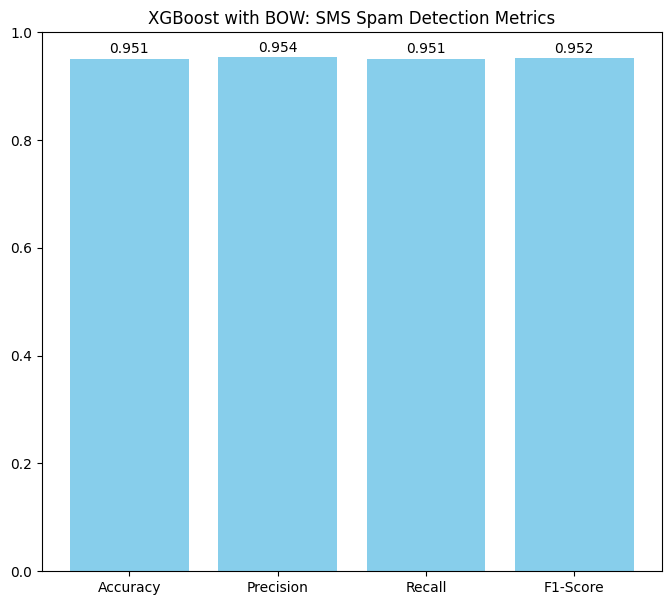

XGBoost with BOW Metrics: {'Accuracy': 0.9509569377990431, 'Precision': 0.9535201387762505, 'Recall': 0.9509569377990431, 'F1-Score': 0.9519426492283126}

--- Training XGBoost with TF-IDF ---


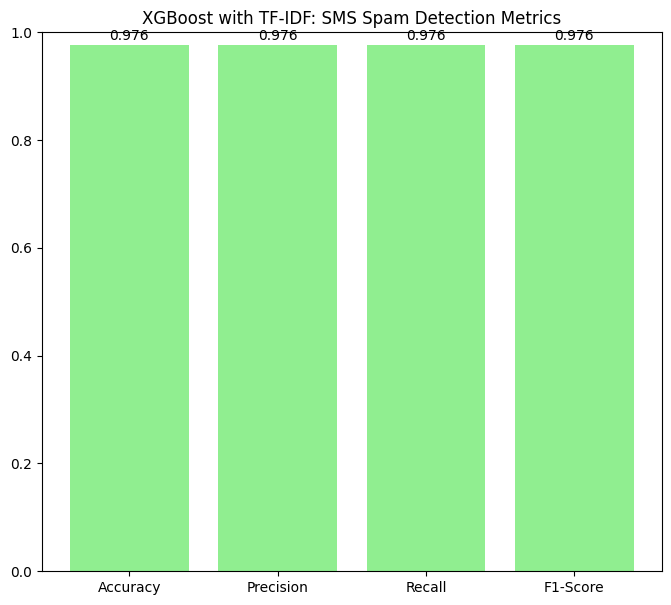

XGBoost with TF-IDF Metrics: {'Accuracy': 0.9760765550239234, 'Precision': 0.9757190830442176, 'Recall': 0.9760765550239234, 'F1-Score': 0.9755859854071891}

--- Training XGBoost with Word2Vec ---


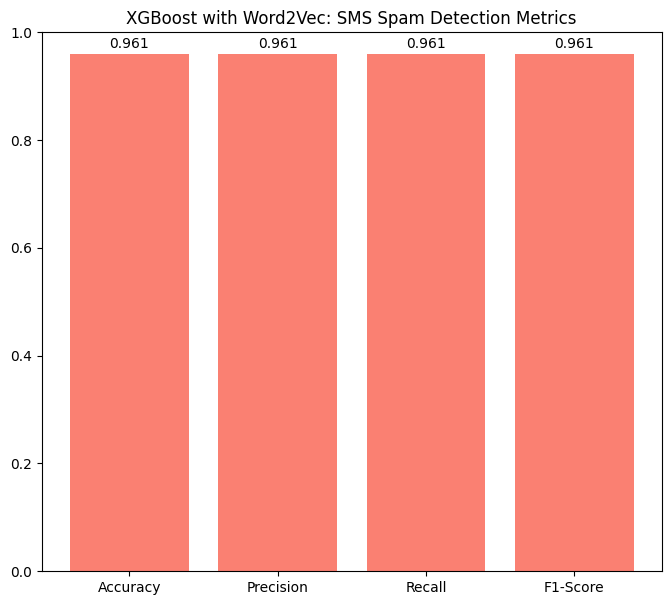

XGBoost with Word2Vec Metrics: {'Accuracy': 0.9605263157894737, 'Precision': 0.9605263157894737, 'Recall': 0.9605263157894737, 'F1-Score': 0.9605263157894737}

--- Training XGBoost with GloVe ---


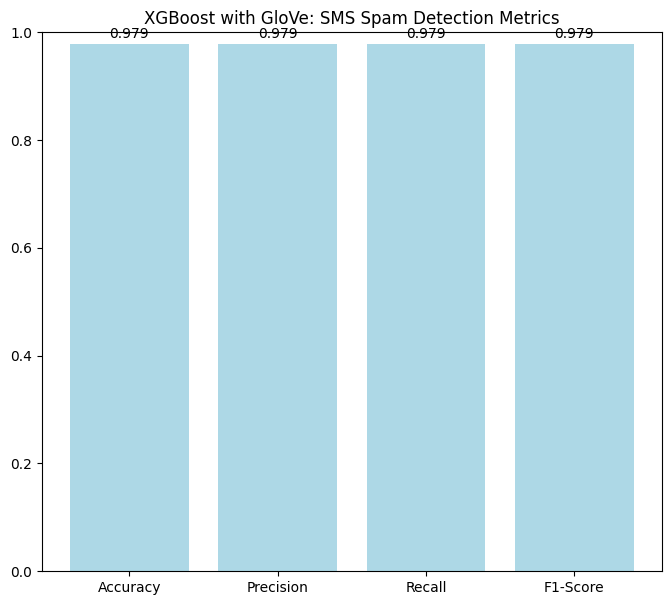

XGBoost with GloVe Metrics: {'Accuracy': 0.979066985645933, 'Precision': 0.978779997292843, 'Recall': 0.979066985645933, 'F1-Score': 0.9787495808063362}

--- Training XGBoost with Doc2Vec ---


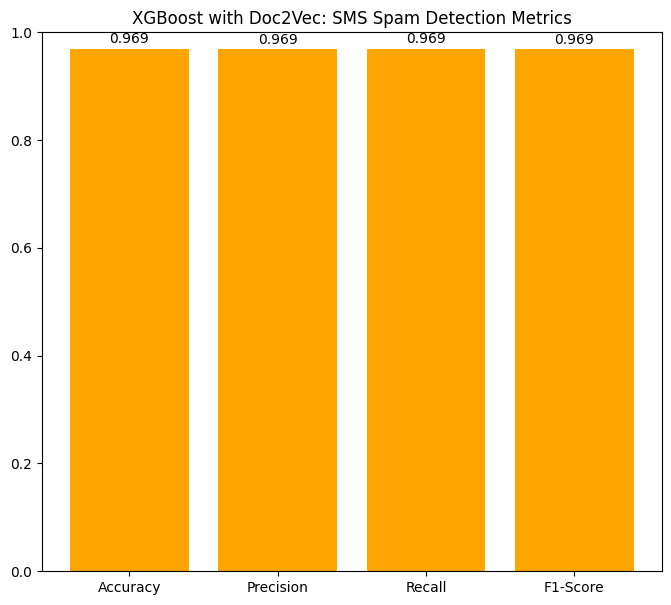

XGBoost with Doc2Vec Metrics: {'Accuracy': 0.9694976076555024, 'Precision': 0.9688770958191416, 'Recall': 0.9694976076555024, 'F1-Score': 0.9689704637099169}

--- Training XGBoost with BERT ---


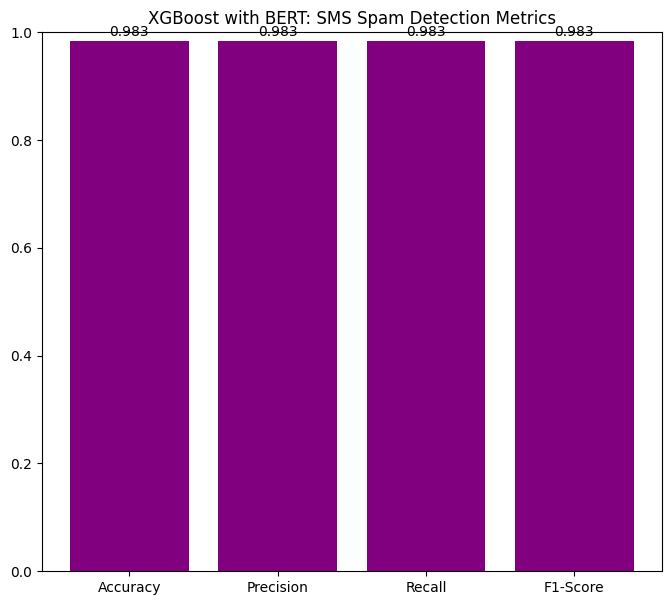

XGBoost with BERT Metrics: {'Accuracy': 0.9832535885167464, 'Precision': 0.9831140624308317, 'Recall': 0.9832535885167464, 'F1-Score': 0.9829819701763373}

XGBoost Results:
     Model Technique  Accuracy  Precision    Recall  F1-Score
0  XGBoost       BOW  0.950957   0.953520  0.950957  0.951943
1  XGBoost    TF-IDF  0.976077   0.975719  0.976077  0.975586
2  XGBoost  Word2Vec  0.960526   0.960526  0.960526  0.960526
3  XGBoost     GloVe  0.979067   0.978780  0.979067  0.978750
4  XGBoost   Doc2Vec  0.969498   0.968877  0.969498  0.968970
5  XGBoost      BERT  0.983254   0.983114  0.983254  0.982982


In [6]:

import pandas as pd
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import os
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Load dataset
dataset_path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError("spam.csv not found at /kaggle/input/sms-spam-collection-dataset/spam.csv. Attach the SMS Spam Collection dataset.")
data = pd.read_csv(dataset_path, encoding='latin-1')
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocessing functions
def preprocess_text_for_bow_tfidf(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text_for_embeddings(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def preprocess_text_for_bert(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

# Apply preprocessing
data_bow_tfidf = data.copy()
data_bow_tfidf['message'] = data_bow_tfidf['message'].apply(preprocess_text_for_bow_tfidf)
data_embeddings = data.copy()
data_embeddings['tokens'] = data_embeddings['message'].apply(preprocess_text_for_embeddings)
data_bert = data.copy()
data_bert['message'] = data_bert['message'].apply(preprocess_text_for_bert)

# Split data
X_bow_tfidf = data_bow_tfidf['message']
y = data_bow_tfidf['label']
X_train_bow_tfidf, X_test_bow_tfidf, y_train, y_test = train_test_split(X_bow_tfidf, y, test_size=0.3, random_state=42)
X_train_tokens, X_test_tokens, _, _ = train_test_split(data_embeddings['tokens'], y, test_size=0.3, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(data_bert['message'], y, test_size=0.3, random_state=42)

# Load GloVe embeddings
glove_path = '/kaggle/working/glove.6B.100d.txt'
def load_glove_embeddings(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found. Run the setup snippet first.")
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings(glove_path)

# Load BERT model and tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token

# Model and techniques
model_name = 'XGBoost'
model_base = XGBClassifier(random_state=42, eval_metric='logloss')
techniques = {
    'BOW': {
        'vectorizer': CountVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'TF-IDF': {
        'vectorizer': TfidfVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'Word2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4, sg=0),
            lambda model, tokens: np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0) if any(word in model.wv for word in tokens) else np.zeros(100)
        )
    },
    'GloVe': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            glove_embeddings,
            lambda emb, tokens: np.mean([emb[word] for word in tokens if word in emb], axis=0) if any(word in emb for word in tokens) else np.zeros(100)
        )
    },
    'Doc2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Doc2Vec(documents=[TaggedDocument(words=tokens, tags=[i]) for i, tokens in enumerate(train_tokens)], vector_size=100, window=5, min_count=2, workers=4, epochs=20),
            lambda model, tokens: model.infer_vector(tokens)
        )
    },
    'BERT': {
        'vectorizer': None,
        'train_data': X_train_bert.tolist(),
        'test_data': X_test_bert.tolist(),
        'is_sparse': False,
        'vector_size': 768,
        'custom_func': lambda train_texts, test_texts: (
            (tokenizer_bert, bert_model),
            lambda texts, tokenizer, model: get_bert_embeddings(texts, tokenizer, model)
        )
    }
}

# Collect results
results = pd.DataFrame(columns=['Model', 'Technique', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Loop over techniques
for technique_name, tech_config in techniques.items():
    print(f"\n--- Training {model_name} with {technique_name} ---")
    
    # Vectorize data
    if technique_name in ['BOW', 'TF-IDF']:
        vectorizer = tech_config['vectorizer']
        X_train_vec = vectorizer.fit_transform(tech_config['train_data'])
        X_test_vec = vectorizer.transform(tech_config['test_data'])
        is_sparse = True
    else:
        custom_obj, get_vector_func = tech_config['custom_func'](tech_config['train_data'], tech_config['test_data'])
        if technique_name == 'Word2Vec':
            w2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'GloVe':
            glove_emb = custom_obj
            X_train_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'Doc2Vec':
            d2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'BERT':
            tokenizer, bert_model = custom_obj
            X_train_vec = get_vector_func(tech_config['train_data'], tokenizer, bert_model)
            X_test_vec = get_vector_func(tech_config['test_data'], tokenizer, bert_model)
        is_sparse = False
    
    # Apply SMOTE
    if is_sparse:
        X_train_vec = X_train_vec.toarray()
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_vec, y_train)
    
    # Train model
    model = XGBClassifier(random_state=42, eval_metric='logloss')
    model.fit(X_train_res, y_train_res)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_vec if not is_sparse else X_test_vec.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results.loc[len(results)] = [model_name, technique_name, accuracy, precision, recall, f1]
    
    # Visualize
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    colors = {'BOW': 'skyblue', 'TF-IDF': 'lightgreen', 'Word2Vec': 'salmon', 'GloVe': 'lightblue', 'Doc2Vec': 'orange', 'BERT': 'purple'}
    plt.figure(figsize=(8, 7))
    plt.bar(metrics.keys(), metrics.values(), color=colors.get(technique_name, 'gray'))
    plt.title(f'{model_name} with {technique_name}: SMS Spam Detection Metrics')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    plt.show()
    print(f"{model_name} with {technique_name} Metrics:", metrics)

print("\nXGBoost Results:")
print(results)


# **LightGBM with all techniques**


--- Training LightGBM with BOW ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 481
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


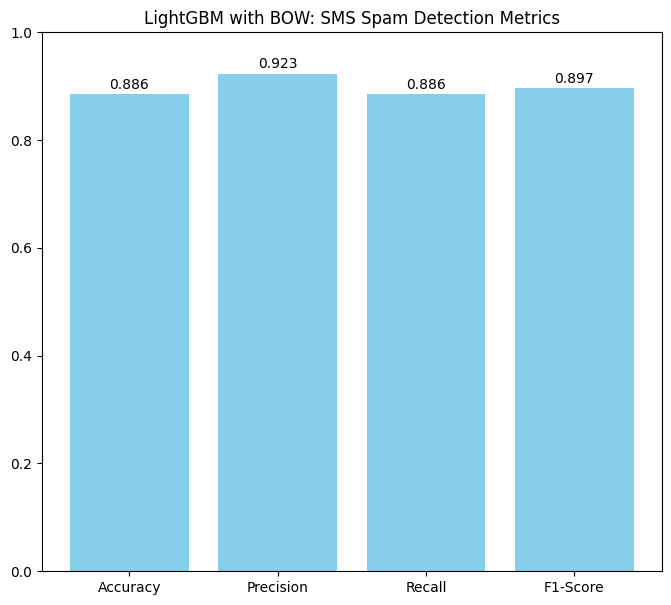

LightGBM with BOW Metrics: {'Accuracy': 0.8857655502392344, 'Precision': 0.9230442158264286, 'Recall': 0.8857655502392344, 'F1-Score': 0.8967622576358377}

--- Training LightGBM with TF-IDF ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23565
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 781
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


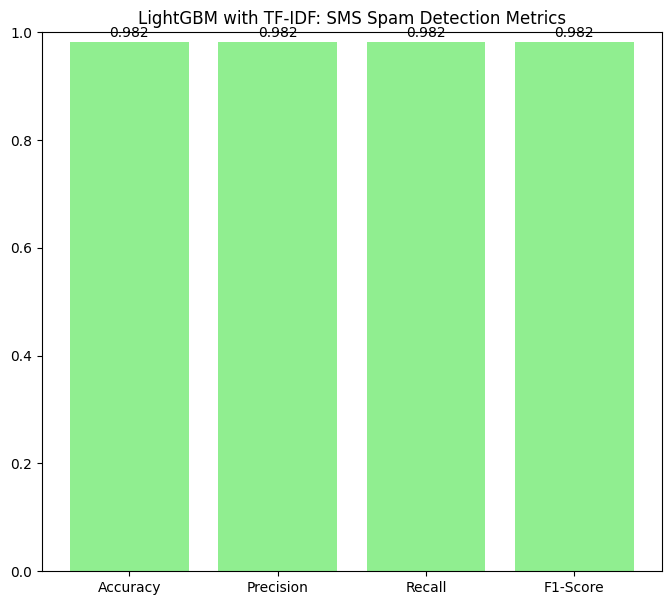

LightGBM with TF-IDF Metrics: {'Accuracy': 0.9820574162679426, 'Precision': 0.9819117011587252, 'Recall': 0.9820574162679426, 'F1-Score': 0.9817281591617398}

--- Training LightGBM with Word2Vec ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


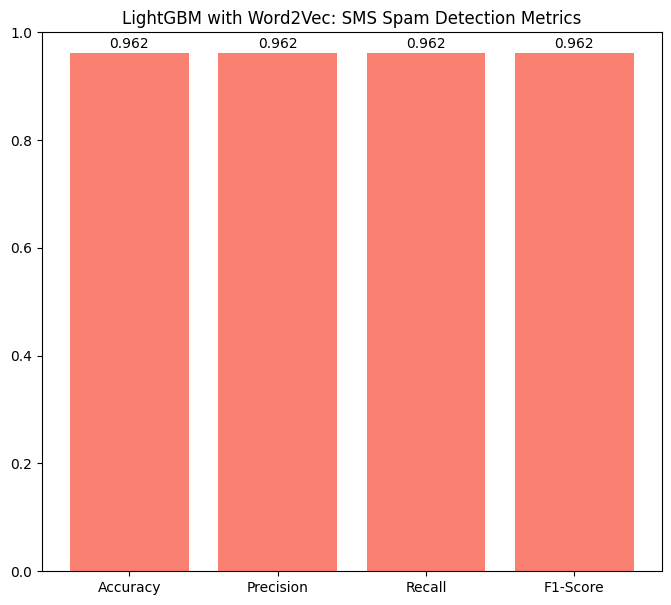

LightGBM with Word2Vec Metrics: {'Accuracy': 0.9617224880382775, 'Precision': 0.9615787359683181, 'Recall': 0.9617224880382775, 'F1-Score': 0.9616478584104481}

--- Training LightGBM with GloVe ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


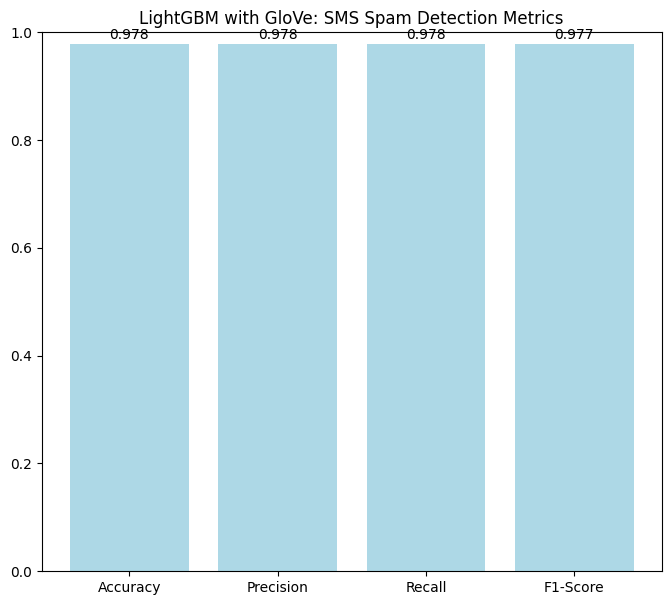

LightGBM with GloVe Metrics: {'Accuracy': 0.9778708133971292, 'Precision': 0.9776104525220786, 'Recall': 0.9778708133971292, 'F1-Score': 0.9773929874887392}

--- Training LightGBM with Doc2Vec ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


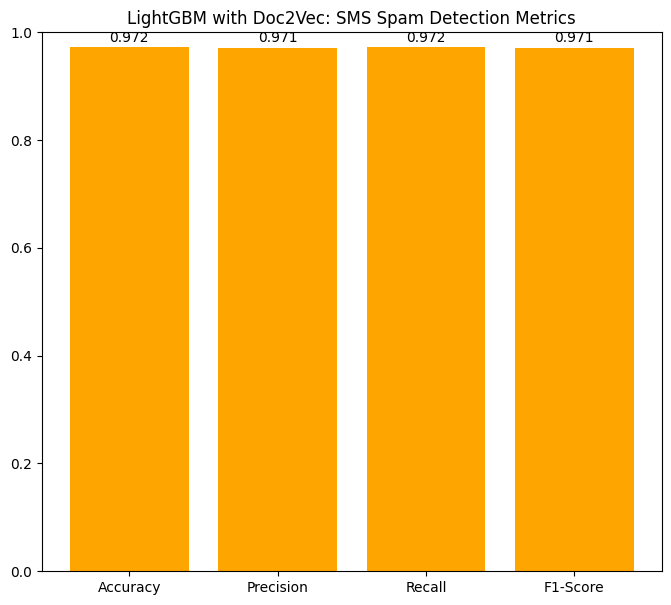

LightGBM with Doc2Vec Metrics: {'Accuracy': 0.97188995215311, 'Precision': 0.9713492530424381, 'Recall': 0.97188995215311, 'F1-Score': 0.9713439097574258}

--- Training LightGBM with BERT ---
[LightGBM] [Info] Number of positive: 3372, number of negative: 3372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 6744, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


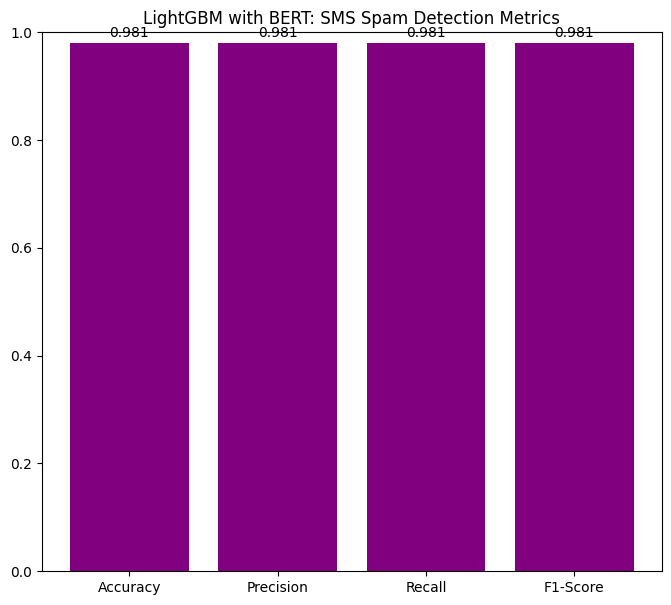

LightGBM with BERT Metrics: {'Accuracy': 0.9808612440191388, 'Precision': 0.980669287483458, 'Recall': 0.9808612440191388, 'F1-Score': 0.9805100364391891}

LightGBM Results:
      Model Technique  Accuracy  Precision    Recall  F1-Score
0  LightGBM       BOW  0.885766   0.923044  0.885766  0.896762
1  LightGBM    TF-IDF  0.982057   0.981912  0.982057  0.981728
2  LightGBM  Word2Vec  0.961722   0.961579  0.961722  0.961648
3  LightGBM     GloVe  0.977871   0.977610  0.977871  0.977393
4  LightGBM   Doc2Vec  0.971890   0.971349  0.971890  0.971344
5  LightGBM      BERT  0.980861   0.980669  0.980861  0.980510


In [7]:

import pandas as pd
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import os
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Load dataset
dataset_path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError("spam.csv not found at /kaggle/input/sms-spam-collection-dataset/spam.csv. Attach the SMS Spam Collection dataset.")
data = pd.read_csv(dataset_path, encoding='latin-1')
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocessing functions
def preprocess_text_for_bow_tfidf(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text_for_embeddings(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def preprocess_text_for_bert(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

# Apply preprocessing
data_bow_tfidf = data.copy()
data_bow_tfidf['message'] = data_bow_tfidf['message'].apply(preprocess_text_for_bow_tfidf)
data_embeddings = data.copy()
data_embeddings['tokens'] = data_embeddings['message'].apply(preprocess_text_for_embeddings)
data_bert = data.copy()
data_bert['message'] = data_bert['message'].apply(preprocess_text_for_bert)

# Split data
X_bow_tfidf = data_bow_tfidf['message']
y = data_bow_tfidf['label']
X_train_bow_tfidf, X_test_bow_tfidf, y_train, y_test = train_test_split(X_bow_tfidf, y, test_size=0.3, random_state=42)
X_train_tokens, X_test_tokens, _, _ = train_test_split(data_embeddings['tokens'], y, test_size=0.3, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(data_bert['message'], y, test_size=0.3, random_state=42)

# Load GloVe embeddings
glove_path = '/kaggle/working/glove.6B.100d.txt'
def load_glove_embeddings(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found. Run the setup snippet first.")
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings(glove_path)

# Load BERT model and tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token

# Model and techniques
model_name = 'LightGBM'
model_base = LGBMClassifier(random_state=42)
techniques = {
    'BOW': {
        'vectorizer': CountVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'TF-IDF': {
        'vectorizer': TfidfVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'Word2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4, sg=0),
            lambda model, tokens: np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0) if any(word in model.wv for word in tokens) else np.zeros(100)
        )
    },
    'GloVe': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            glove_embeddings,
            lambda emb, tokens: np.mean([emb[word] for word in tokens if word in emb], axis=0) if any(word in emb for word in tokens) else np.zeros(100)
        )
    },
    'Doc2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Doc2Vec(documents=[TaggedDocument(words=tokens, tags=[i]) for i, tokens in enumerate(train_tokens)], vector_size=100, window=5, min_count=2, workers=4, epochs=20),
            lambda model, tokens: model.infer_vector(tokens)
        )
    },
    'BERT': {
        'vectorizer': None,
        'train_data': X_train_bert.tolist(),
        'test_data': X_test_bert.tolist(),
        'is_sparse': False,
        'vector_size': 768,
        'custom_func': lambda train_texts, test_texts: (
            (tokenizer_bert, bert_model),
            lambda texts, tokenizer, model: get_bert_embeddings(texts, tokenizer, model)
        )
    }
}

# Collect results
results = pd.DataFrame(columns=['Model', 'Technique', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Loop over techniques
for technique_name, tech_config in techniques.items():
    print(f"\n--- Training {model_name} with {technique_name} ---")
    
    # Vectorize data
    if technique_name in ['BOW', 'TF-IDF']:
        vectorizer = tech_config['vectorizer']
        X_train_vec = vectorizer.fit_transform(tech_config['train_data'])
        X_test_vec = vectorizer.transform(tech_config['test_data'])
        is_sparse = True
    else:
        custom_obj, get_vector_func = tech_config['custom_func'](tech_config['train_data'], tech_config['test_data'])
        if technique_name == 'Word2Vec':
            w2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'GloVe':
            glove_emb = custom_obj
            X_train_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'Doc2Vec':
            d2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'BERT':
            tokenizer, bert_model = custom_obj
            X_train_vec = get_vector_func(tech_config['train_data'], tokenizer, bert_model)
            X_test_vec = get_vector_func(tech_config['test_data'], tokenizer, bert_model)
        is_sparse = False
    
    # Apply SMOTE
    if is_sparse:
        X_train_vec = X_train_vec.toarray()
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_vec, y_train)
    
    # Train model
    model = LGBMClassifier(random_state=42)
    model.fit(X_train_res, y_train_res)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_vec if not is_sparse else X_test_vec.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results.loc[len(results)] = [model_name, technique_name, accuracy, precision, recall, f1]
    
    # Visualize
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    colors = {'BOW': 'skyblue', 'TF-IDF': 'lightgreen', 'Word2Vec': 'salmon', 'GloVe': 'lightblue', 'Doc2Vec': 'orange', 'BERT': 'purple'}
    plt.figure(figsize=(8, 7))
    plt.bar(metrics.keys(), metrics.values(), color=colors.get(technique_name, 'gray'))
    plt.title(f'{model_name} with {technique_name}: SMS Spam Detection Metrics')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    plt.show()
    print(f"{model_name} with {technique_name} Metrics:", metrics)

print("\nLightGBM Results:")
print(results)


# **Support Vector Machine with all techniques**


--- Training SVM with BOW ---


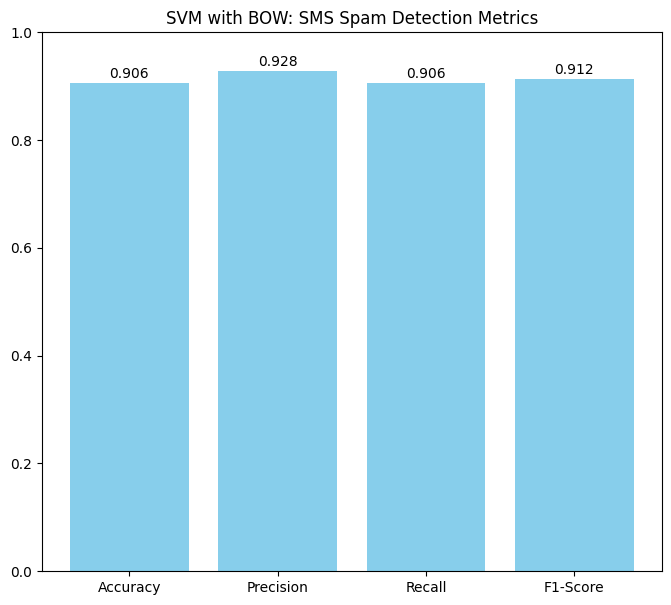

SVM with BOW Metrics: {'Accuracy': 0.9055023923444976, 'Precision': 0.9278715527634952, 'Recall': 0.9055023923444976, 'F1-Score': 0.9124921694638898}

--- Training SVM with TF-IDF ---


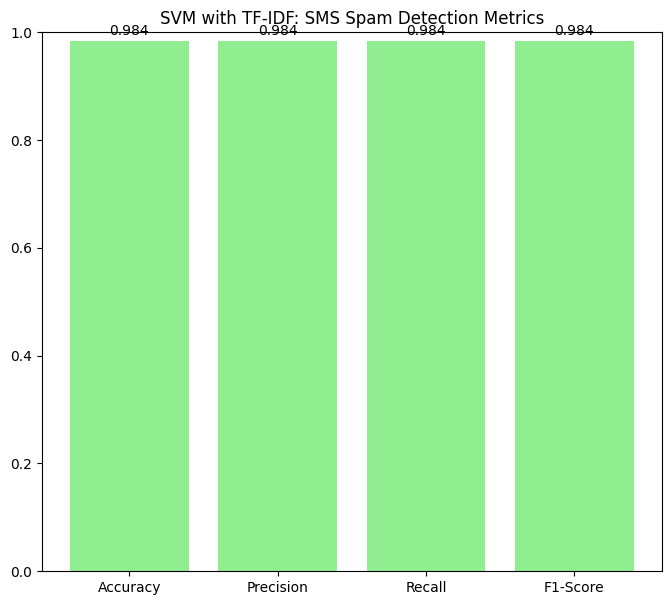

SVM with TF-IDF Metrics: {'Accuracy': 0.9844497607655502, 'Precision': 0.9843508602603089, 'Recall': 0.9844497607655502, 'F1-Score': 0.9841975437351703}

--- Training SVM with Word2Vec ---


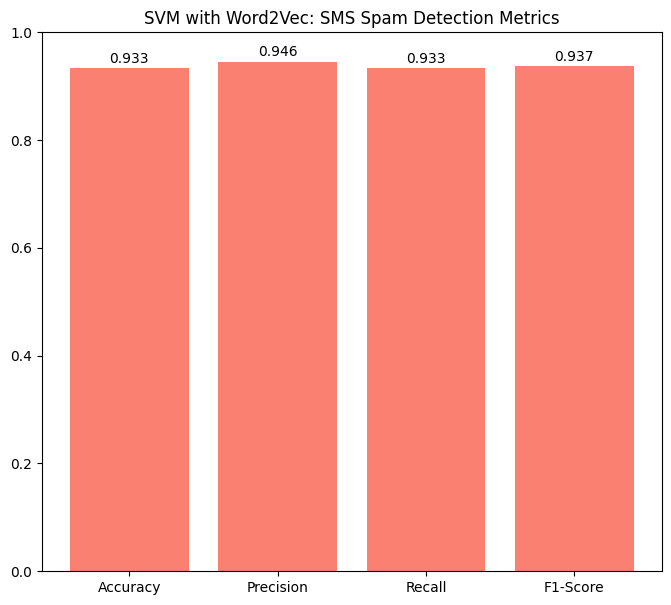

SVM with Word2Vec Metrics: {'Accuracy': 0.9330143540669856, 'Precision': 0.9455613730662905, 'Recall': 0.9330143540669856, 'F1-Score': 0.9368028151568414}

--- Training SVM with GloVe ---


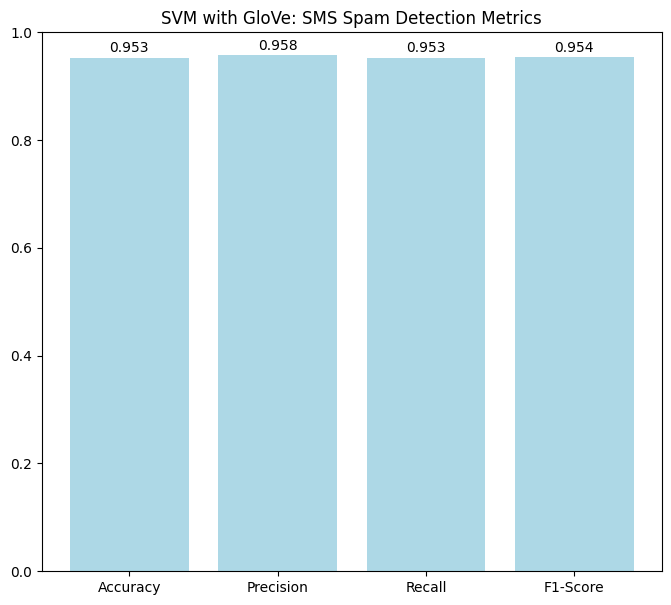

SVM with GloVe Metrics: {'Accuracy': 0.9527511961722488, 'Precision': 0.9577553696530694, 'Recall': 0.9527511961722488, 'F1-Score': 0.9543613866666936}

--- Training SVM with Doc2Vec ---


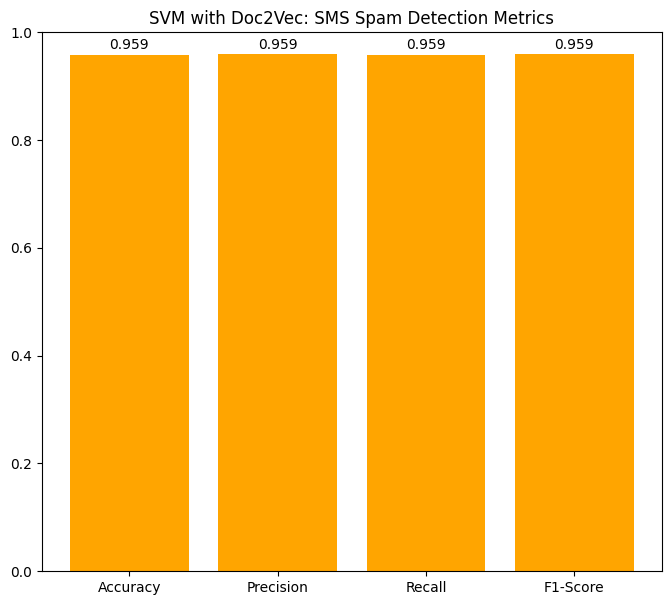

SVM with Doc2Vec Metrics: {'Accuracy': 0.958732057416268, 'Precision': 0.9589821833878095, 'Recall': 0.958732057416268, 'F1-Score': 0.9588511011390893}

--- Training SVM with BERT ---


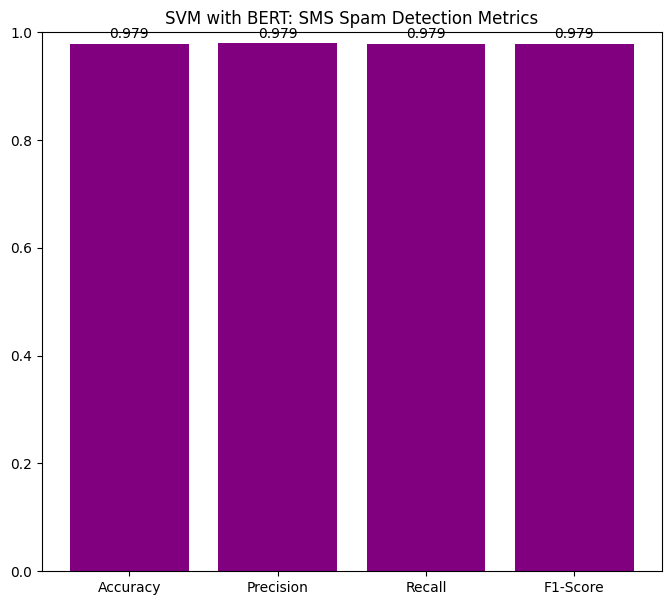

SVM with BERT Metrics: {'Accuracy': 0.979066985645933, 'Precision': 0.979200749586412, 'Recall': 0.979066985645933, 'F1-Score': 0.9791273701430164}

SVM Results:
  Model Technique  Accuracy  Precision    Recall  F1-Score
0   SVM       BOW  0.905502   0.927872  0.905502  0.912492
1   SVM    TF-IDF  0.984450   0.984351  0.984450  0.984198
2   SVM  Word2Vec  0.933014   0.945561  0.933014  0.936803
3   SVM     GloVe  0.952751   0.957755  0.952751  0.954361
4   SVM   Doc2Vec  0.958732   0.958982  0.958732  0.958851
5   SVM      BERT  0.979067   0.979201  0.979067  0.979127


In [8]:

import pandas as pd
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import os
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Load dataset
dataset_path = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError("spam.csv not found at /kaggle/input/sms-spam-collection-dataset/spam.csv. Attach the SMS Spam Collection dataset.")
data = pd.read_csv(dataset_path, encoding='latin-1')
data = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocessing functions
def preprocess_text_for_bow_tfidf(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text_for_embeddings(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def preprocess_text_for_bert(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

# Apply preprocessing
data_bow_tfidf = data.copy()
data_bow_tfidf['message'] = data_bow_tfidf['message'].apply(preprocess_text_for_bow_tfidf)
data_embeddings = data.copy()
data_embeddings['tokens'] = data_embeddings['message'].apply(preprocess_text_for_embeddings)
data_bert = data.copy()
data_bert['message'] = data_bert['message'].apply(preprocess_text_for_bert)

# Split data
X_bow_tfidf = data_bow_tfidf['message']
y = data_bow_tfidf['label']
X_train_bow_tfidf, X_test_bow_tfidf, y_train, y_test = train_test_split(X_bow_tfidf, y, test_size=0.3, random_state=42)
X_train_tokens, X_test_tokens, _, _ = train_test_split(data_embeddings['tokens'], y, test_size=0.3, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(data_bert['message'], y, test_size=0.3, random_state=42)

# Load GloVe embeddings
glove_path = '/kaggle/working/glove.6B.100d.txt'
def load_glove_embeddings(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found. Run the setup snippet first.")
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings(glove_path)

# Load BERT model and tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token

# Model and techniques
model_name = 'SVM'
model_base = LinearSVC(random_state=42)
techniques = {
    'BOW': {
        'vectorizer': CountVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'TF-IDF': {
        'vectorizer': TfidfVectorizer(max_features=2500),
        'train_data': X_train_bow_tfidf,
        'test_data': X_test_bow_tfidf,
        'is_sparse': True,
        'vector_size': None
    },
    'Word2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4, sg=0),
            lambda model, tokens: np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0) if any(word in model.wv for word in tokens) else np.zeros(100)
        )
    },
    'GloVe': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            glove_embeddings,
            lambda emb, tokens: np.mean([emb[word] for word in tokens if word in emb], axis=0) if any(word in emb for word in tokens) else np.zeros(100)
        )
    },
    'Doc2Vec': {
        'vectorizer': None,
        'train_data': X_train_tokens,
        'test_data': X_test_tokens,
        'is_sparse': False,
        'vector_size': 100,
        'custom_func': lambda train_tokens, test_tokens: (
            Doc2Vec(documents=[TaggedDocument(words=tokens, tags=[i]) for i, tokens in enumerate(train_tokens)], vector_size=100, window=5, min_count=2, workers=4, epochs=20),
            lambda model, tokens: model.infer_vector(tokens)
        )
    },
    'BERT': {
        'vectorizer': None,
        'train_data': X_train_bert.tolist(),
        'test_data': X_test_bert.tolist(),
        'is_sparse': False,
        'vector_size': 768,
        'custom_func': lambda train_texts, test_texts: (
            (tokenizer_bert, bert_model),
            lambda texts, tokenizer, model: get_bert_embeddings(texts, tokenizer, model)
        )
    }
}

# Collect results
results = pd.DataFrame(columns=['Model', 'Technique', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Loop over techniques
for technique_name, tech_config in techniques.items():
    print(f"\n--- Training {model_name} with {technique_name} ---")
    
    # Vectorize data
    if technique_name in ['BOW', 'TF-IDF']:
        vectorizer = tech_config['vectorizer']
        X_train_vec = vectorizer.fit_transform(tech_config['train_data'])
        X_test_vec = vectorizer.transform(tech_config['test_data'])
        is_sparse = True
    else:
        custom_obj, get_vector_func = tech_config['custom_func'](tech_config['train_data'], tech_config['test_data'])
        if technique_name == 'Word2Vec':
            w2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(w2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'GloVe':
            glove_emb = custom_obj
            X_train_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(glove_emb, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'Doc2Vec':
            d2v_model = custom_obj
            X_train_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['train_data']])
            X_test_vec = np.array([get_vector_func(d2v_model, tokens) for tokens in tech_config['test_data']])
        elif technique_name == 'BERT':
            tokenizer, bert_model = custom_obj
            X_train_vec = get_vector_func(tech_config['train_data'], tokenizer, bert_model)
            X_test_vec = get_vector_func(tech_config['test_data'], tokenizer, bert_model)
        is_sparse = False
    
    # Apply SMOTE
    if is_sparse:
        X_train_vec = X_train_vec.toarray()
    X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train_vec, y_train)
    
    # Train model
    model = LinearSVC(random_state=42)
    if technique_name == 'GloVe':
        X_train_res = np.maximum(X_train_res, 0)  # Ensure non-negative for SVM
        X_test_vec = np.maximum(X_test_vec, 0)
    model.fit(X_train_res, y_train_res)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_vec if not is_sparse else X_test_vec.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results.loc[len(results)] = [model_name, technique_name, accuracy, precision, recall, f1]
    
    # Visualize
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    colors = {'BOW': 'skyblue', 'TF-IDF': 'lightgreen', 'Word2Vec': 'salmon', 'GloVe': 'lightblue', 'Doc2Vec': 'orange', 'BERT': 'purple'}
    plt.figure(figsize=(8, 7))
    plt.bar(metrics.keys(), metrics.values(), color=colors.get(technique_name, 'gray'))
    plt.title(f'{model_name} with {technique_name}: SMS Spam Detection Metrics')
    plt.ylim(0, 1)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    plt.show()
    print(f"{model_name} with {technique_name} Metrics:", metrics)

print("\nSVM Results:")
print(results)
